# 1. Distribution of Data in General

### 1.1 Import packages for analysis & visualization

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("white")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

### 1.2 Load cleaned dataset

In [48]:
med = pd.read_pickle('Data_Sets/Medical_Appointments_1.pkl')

In [49]:
med

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Day_Of_Week,Waiting_Days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,Jardim Da Penha,0,1,0,0,0,0,No,Friday,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,Jardim Da Penha,0,0,0,0,0,0,No,Friday,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,Mata Da Praia,0,0,0,0,0,0,No,Friday,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,Pontal De Camburi,0,0,0,0,0,0,No,Friday,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,Jardim Da Penha,0,1,1,0,0,0,No,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,Maria Ortiz,0,0,0,0,0,1,No,Tuesday,35
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,Maria Ortiz,0,0,0,0,0,1,No,Tuesday,35
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,Maria Ortiz,0,0,0,0,0,1,No,Tuesday,41
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,Maria Ortiz,0,0,0,0,0,1,No,Tuesday,41


### 1.3 Distribution of numerical data

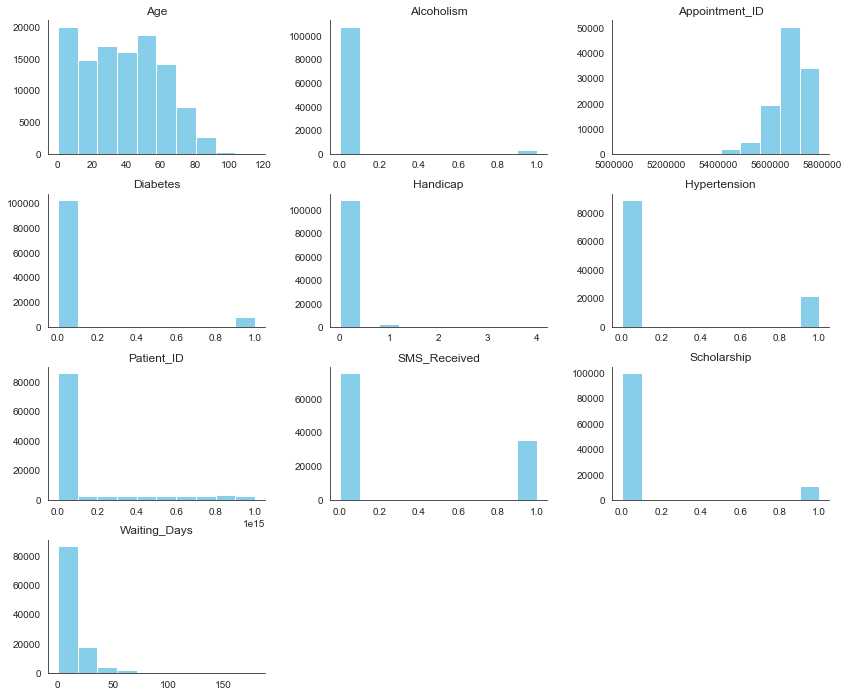

In [50]:
med.hist(figsize=(14,12),grid=False, color = "skyblue", sharex=False)
sns.despine(top=True, right=True);

### 1.4 Distribution of categorical data

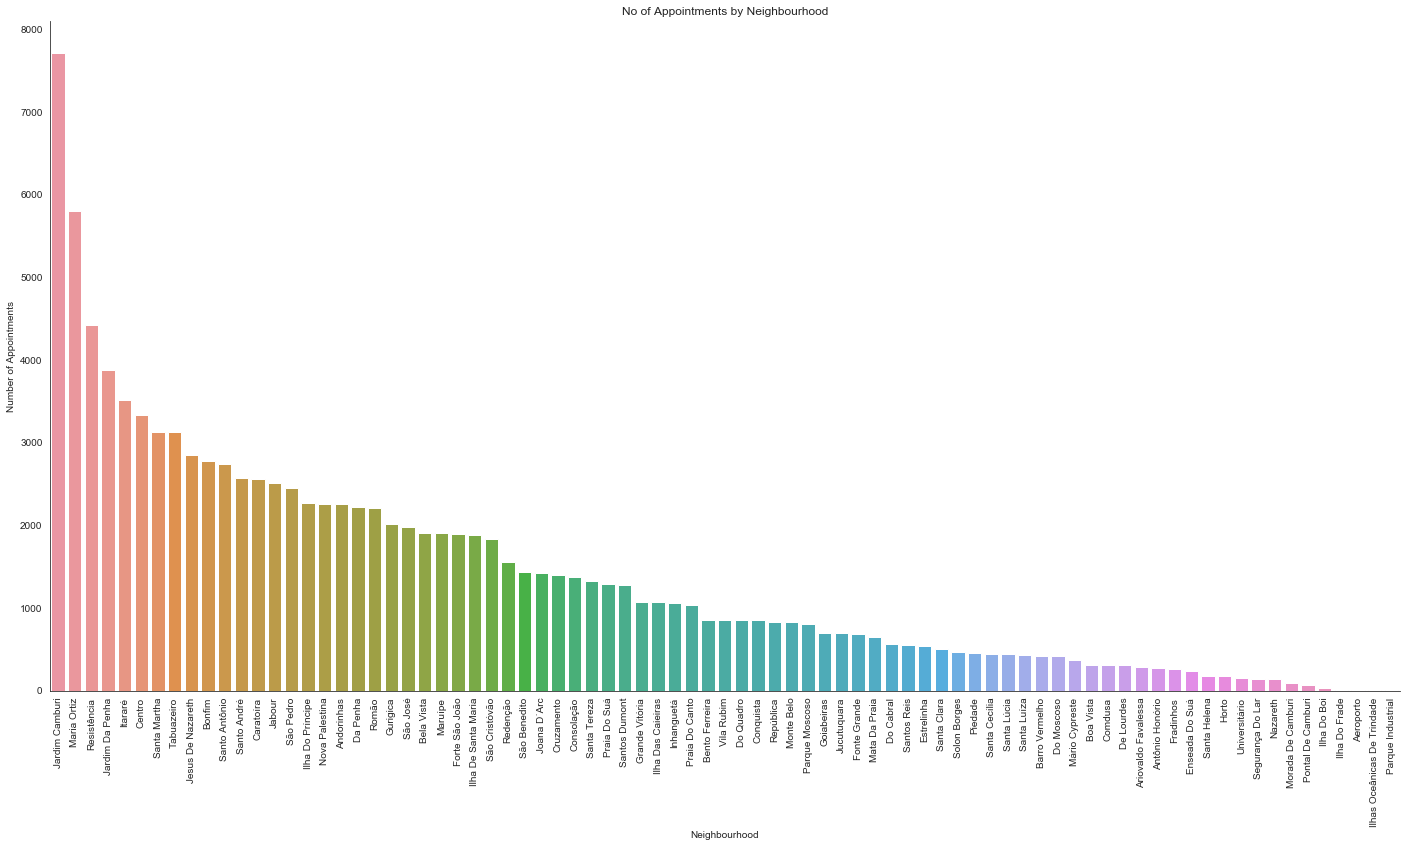

In [51]:
# Neighbourhood

ax = sns.catplot(x="Neighbourhood",
                 kind="count",
                 data=med,
                 height=10,
                 aspect=2,
                 order=med["Neighbourhood"].value_counts().index)
ax.set_xticklabels(rotation=90)
ax.set(ylabel='Number of Appointments',title="No of Appointments by Neighbourhood");


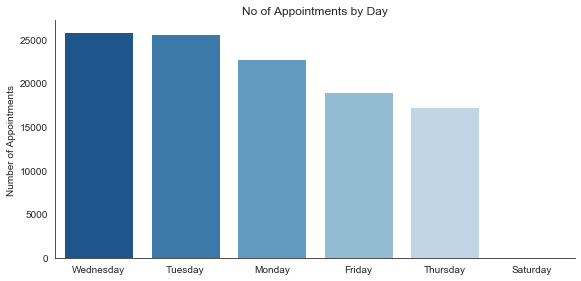

In [52]:
# Day Of Week

ax = sns.catplot(x="Day_Of_Week", kind="count", data=med, height=4, aspect=2, order=med["Day_Of_Week"].value_counts().index, palette="Blues_r")
ax.set(xlabel='',ylabel='Number of Appointments',title="No of Appointments by Day");

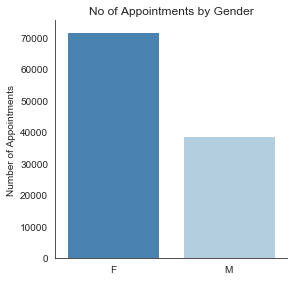

In [53]:
# Gender
ax = sns.catplot(x="Gender", kind="count", data=med, height=4, aspect=1, palette="Blues_r")
ax.set(xlabel='',ylabel='Number of Appointments',title="No of Appointments by Gender");

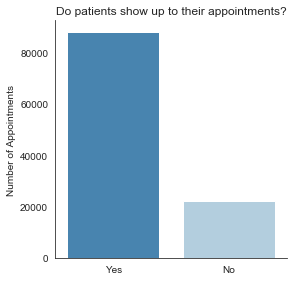

In [54]:
# No Show
ax = sns.catplot(x="No_Show", kind="count", data=med, height=4, aspect=1, palette="Blues_r")
ax.set(xlabel='',ylabel='Number of Appointments',title="Do patients show up to their appointments?")
ax.set_xticklabels(['Yes','No']);
plt.savefig('Figures_Presentation/No_Show_Ratio.png',dpi=800,bbox_inches='tight')

In [55]:
med.No_Show.value_counts()

No     88207
Yes    22314
Name: No_Show, dtype: int64

### 1.5 Convert categorical data into numerical
    
    Gender: replace F with 1, M with 0.
    No-show: replace Yes with 1, No with 0.

In [56]:
med_numeric = med.copy()

In [57]:
med_numeric['Gender'] = (med_numeric['Gender'] == 'F').astype(int) #keeping Female (F) in Gender as 1, else 0
med_numeric['No_Show'] = (med_numeric['No_Show'] == 'Yes').astype(int) #keeping Yes in No_Show as 1, else 0

In [58]:
med_numeric.Gender.unique()

array([1, 0], dtype=int64)

In [59]:
med_numeric.No_Show.unique()

array([0, 1], dtype=int64)

In [60]:
med_numeric.dtypes

Patient_ID                  int64
Appointment_ID              int64
Gender                      int32
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_Received                int64
No_Show                     int32
Day_Of_Week                object
Waiting_Days                int64
dtype: object

# 2. Distribution of Target Variable: No-Show

### 2.1 No-Shows by Gender

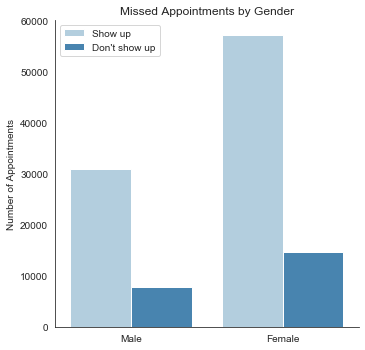

In [61]:
ax = sns.catplot(x="Gender",
                 kind="count",
                 data=med_numeric,
                 hue="No_Show",
                 ci=None,
                 palette="Blues",
                 legend_out = False)

# customize axis titles:
ax.set(xlabel='',ylabel='Number of Appointments',title="Missed Appointments by Gender")
ax.set_xticklabels(['Male',"Female"])

# customize legend:
leg = ax.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l);

### 2.2 No-Shows by Age

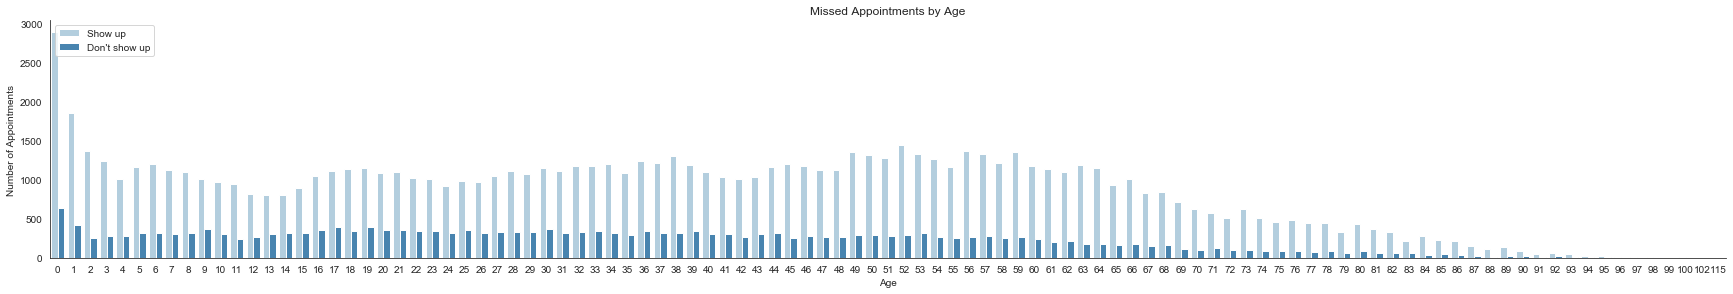

In [62]:
ax = sns.catplot(x="Age",
                 kind="count",
                 data=med_numeric,
                 hue="No_Show",
                 ci=None,
                 palette="Blues",
                 height=4,
                 aspect=6,
                 legend_out = False)

# customize axis titles:
ax.set(ylabel='Number of Appointments',title="Missed Appointments by Age")

# customize legend:
plt.legend(loc='upper left')
leg = ax.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l);

In [63]:
med_numeric1 = med_numeric.copy()

In [64]:
med_numeric1 = med_numeric1[['Age', 'No_Show']]

In [65]:
med_numeric1['Probability'] = med_numeric1.groupby(['Age']).sum()['No_Show']/med_numeric1.groupby(['Age']).count()['No_Show']

In [66]:
med_numeric1.groupby(['Age']).sum()['No_Show']/med_numeric1.groupby(['Age']).count()['No_Show']

Age
0      0.180559
1      0.182578
2      0.155748
3      0.183080
4      0.217090
         ...   
98     0.166667
99     0.000000
100    0.000000
102    0.000000
115    0.600000
Name: No_Show, Length: 103, dtype: float64

In [67]:
med_numeric1.groupby(['Age']).count().reset_index()['Age']

0        0
1        1
2        2
3        3
4        4
      ... 
98      98
99      99
100    100
101    102
102    115
Name: Age, Length: 103, dtype: int64

In [68]:
med_numeric1.groupby(['Age']).count()['No_Show']

Age
0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: No_Show, Length: 103, dtype: int64

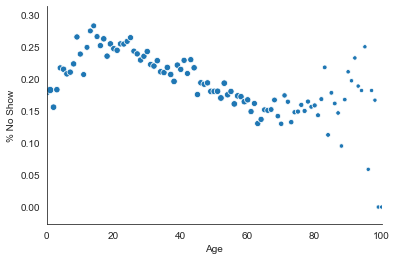

In [69]:
ax = sns.scatterplot(x=med_numeric1.groupby(['Age']).count().reset_index()['Age'],
                     y=med_numeric1.groupby(['Age']).sum()['No_Show']/med_numeric1.groupby(['Age']).count()['No_Show'],
                     size=med_numeric1.groupby(['Age']).count()['No_Show'],
                    legend = False)

ax.set(xlabel='Age', ylabel='% No Show', title='')
ax.set(xlim=(0,100))
sns.despine(top=True, right=True);
plt.savefig('Figures_Presentation/Age.png',dpi=800,bbox_inches='tight')

### 2.3 No-Shows by Neighbourhood

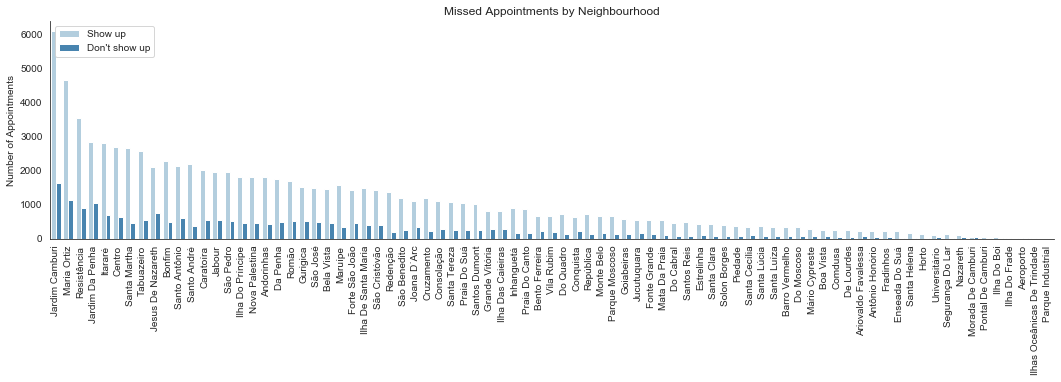

In [70]:
plt.figure(figsize=(18,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(med_numeric.Neighbourhood),
                   hue=med_numeric.No_Show,
                   order=med_numeric.Neighbourhood.value_counts().index,
                   palette="Blues")

# customize axis titles:
ax.set(ylabel='Number of Appointments',title="Missed Appointments by Neighbourhood")

# customize legend:
plt.legend(loc='upper left')
leg = ax.axes.get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
sns.despine(top=True, right=True);

In [71]:
neighbourhood_ratio = med_numeric[med_numeric.No_Show == 1].groupby(['Neighbourhood']).size()/med_numeric.groupby(['Neighbourhood']).size()

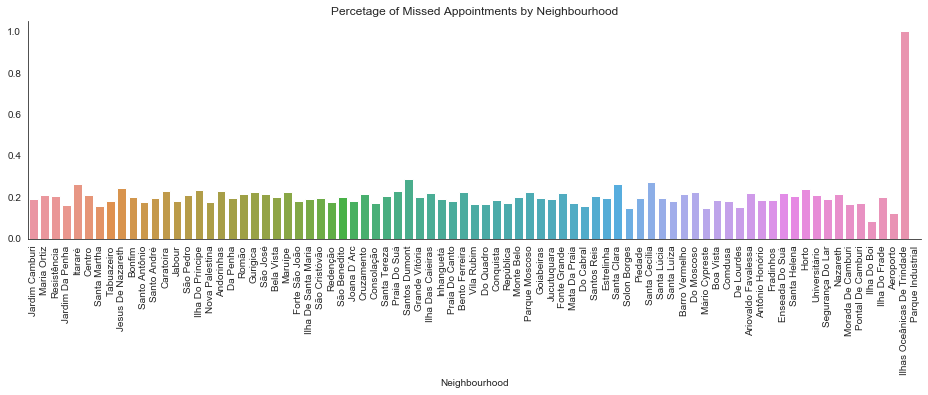

In [72]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=neighbourhood_ratio.index,
                 y=neighbourhood_ratio,
                 order=med.Neighbourhood.value_counts().index)

# customize axis:
ax.set_title("Percetage of Missed Appointments by Neighbourhood")
sns.despine(top=True, right=True)
plt.show();

### 2.4 No-Shows by Scholarship

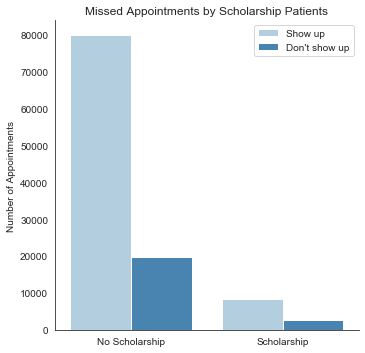

In [73]:
ax = sns.catplot(x="Scholarship",
                 kind="count",
                 data=med_numeric,
                 hue="No_Show",
                 ci=None,
                 palette="Blues",
                 legend_out = False)

# customize axis titles:
ax.set(xlabel='',ylabel='Number of Appointments',title="Missed Appointments by Scholarship Patients")
ax.set_xticklabels(['No Scholarship',"Scholarship"])

# customize legend:
leg = ax.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l);

### 2.5 No-Shows by Hypertension

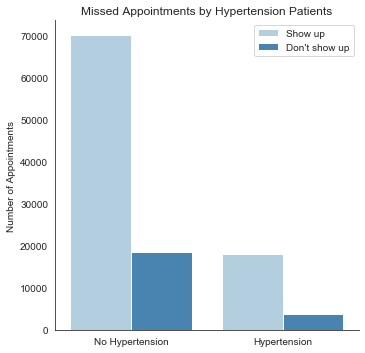

In [74]:
ax = sns.catplot(x="Hypertension",
                 kind="count",
                 data=med_numeric,
                 hue="No_Show",
                 ci=None,
                 palette="Blues",
                 legend_out = False)

# customize axis titles:
ax.set(xlabel='',ylabel='Number of Appointments',title="Missed Appointments by Hypertension Patients")
ax.set_xticklabels(['No Hypertension',"Hypertension"])

# customize legend:
leg = ax.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l);

### 2.6 No-Shows by Diabetes

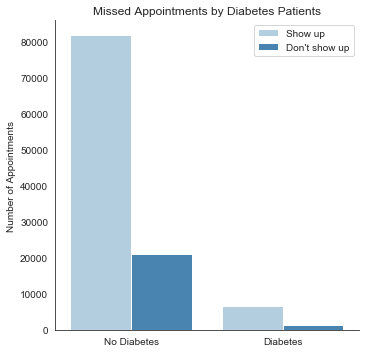

In [75]:
ax = sns.catplot(x="Diabetes",
                 kind="count",
                 data=med_numeric,
                 hue="No_Show",
                 ci=None,
                 palette="Blues",
                 legend_out = False)

# customize axis titles:
ax.set(xlabel='',ylabel='Number of Appointments',title="Missed Appointments by Diabetes Patients")
ax.set_xticklabels(['No Diabetes',"Diabetes"])

# customize legend:
leg = ax.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l);

### 2.7 No-Shows by Alcoholism

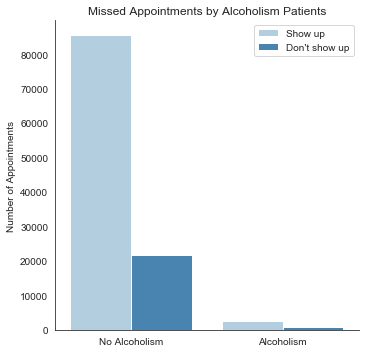

In [76]:
ax = sns.catplot(x="Alcoholism",
                 kind="count",
                 data=med_numeric,
                 hue="No_Show",
                 ci=None,
                 palette="Blues",
                 legend_out = False)

# customize axis titles:
ax.set(xlabel='',ylabel='Number of Appointments',title="Missed Appointments by Alcoholism Patients")
ax.set_xticklabels(['No Alcoholism',"Alcoholism"])

# customize legend:
leg = ax.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l);

### 2.8 No-Shows by Handicap

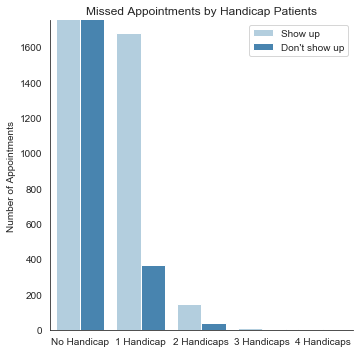

In [77]:
ax = sns.catplot(x="Handicap",
                 kind="count",
                 data=med_numeric,
                 hue="No_Show",
                 ci=None,
                 palette="Blues",
                 legend_out = False)

# customize axis titles:
ax.set(xlabel='',ylabel='Number of Appointments',title="Missed Appointments by Handicap Patients")
ax.set_xticklabels(['No Handicap',"1 Handicap","2 Handicaps","3 Handicaps","4 Handicaps"])
axes = ax.axes
axes[0,0].set_ylim(0,1750)

# customize legend:
leg = ax.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l);

In [78]:
handicap_ratio = med_numeric[med_numeric.No_Show > 0].groupby(['Handicap']).size()/med_numeric.groupby(['Handicap']).size()

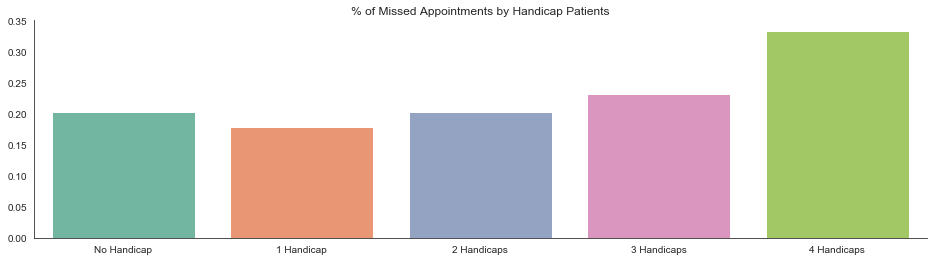

In [79]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x=handicap_ratio.index,
                 y=handicap_ratio,
                 order=med.Handicap.value_counts().index,
                 palette="Set2")

# customize axis:
sns.despine(top=True, right=True)
ax.set(xlabel='',ylabel='',title="% of Missed Appointments by Handicap Patients")
ax.set_xticklabels(['No Handicap',"1 Handicap","2 Handicaps","3 Handicaps","4 Handicaps"])
plt.show();

### 2.9 No-Shows by SMS-Received

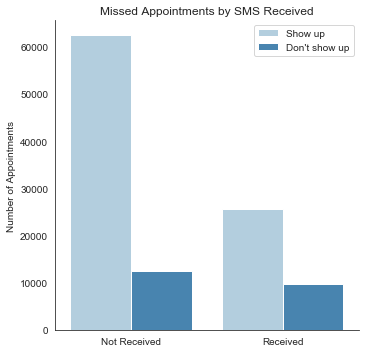

In [80]:
ax = sns.catplot(x="SMS_Received",
                 kind="count",
                 data=med_numeric,
                 hue="No_Show",
                 ci=None,
                 palette="Blues",
                 legend_out = False)

# customize axis titles:
ax.set(xlabel='',ylabel='Number of Appointments',title="Missed Appointments by SMS Received")
ax.set_xticklabels(['Not Received',"Received"])

# customize legend:
leg = ax.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l);

### 2.10 No-Shows by Day of Week

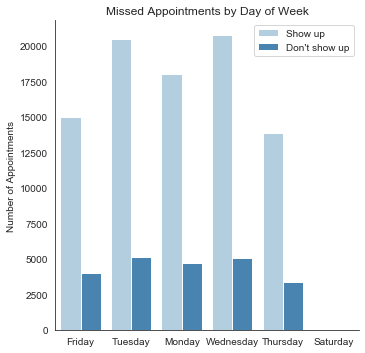

In [81]:
ax = sns.catplot(x="Day_Of_Week",
                 kind="count",
                 data=med_numeric,
                 hue="No_Show",
                 ci=None,
                 palette="Blues",
                 legend_out = False)

# customize axis titles:
ax.set(xlabel='',ylabel='Number of Appointments',title="Missed Appointments by Day of Week")
axes = ax.axes

# customize legend:
leg = ax.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l);

In [82]:
day_of_week_ratio = med_numeric[med_numeric.No_Show > 0].groupby(['Day_Of_Week']).size()/med_numeric.groupby(['Day_Of_Week']).size()

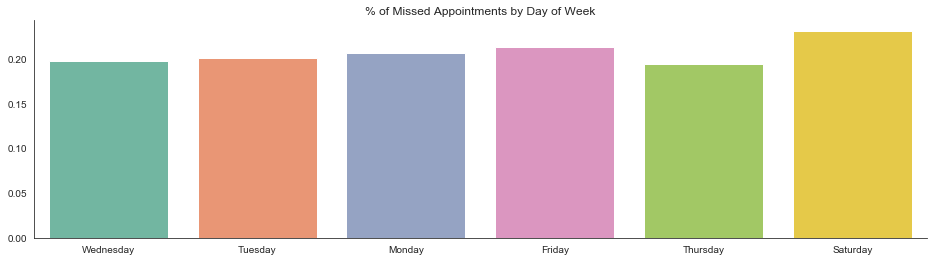

In [83]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x=day_of_week_ratio.index,
                 y=day_of_week_ratio,
                 order=med.Day_Of_Week.value_counts().index,
                 palette="Set2")

# customize axis:
sns.despine(top=True, right=True)
ax.set(xlabel='',ylabel='',title="% of Missed Appointments by Day of Week")
plt.show();

### 2.11 No-Shows by Waiting Days

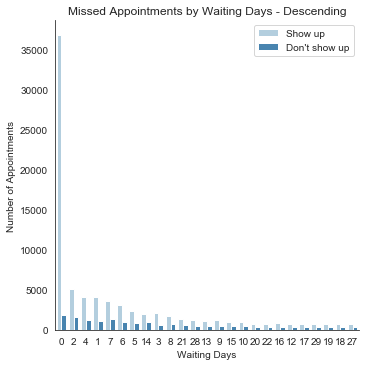

In [84]:
ax = sns.catplot(x="Waiting_Days",
                 kind="count",
                 data=med_numeric,
                 hue="No_Show",
                 order=med.Waiting_Days.value_counts().iloc[:25].index,
                 ci=None,
                 palette="Blues",
                 #height=4,
                 #aspect=6,
                 legend_out = False)

# customize axis titles:
ax.set(xlabel='Waiting Days',ylabel='Number of Appointments',title="Missed Appointments by Waiting Days - Descending")
axes = ax.axes

# customize legend:
leg = ax.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l);

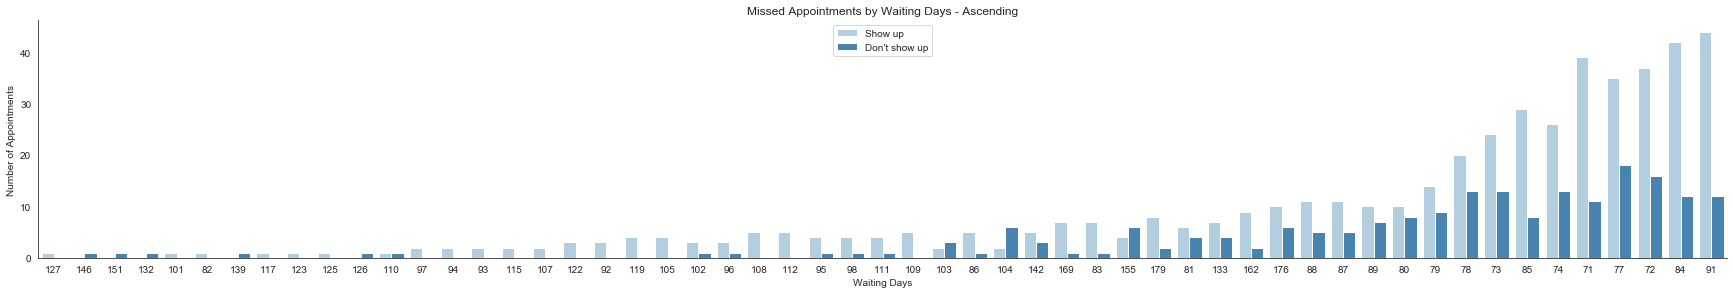

In [85]:
ax = sns.catplot(x="Waiting_Days",
                 kind="count",
                 data=med_numeric,
                 hue="No_Show",
                 order=med.Waiting_Days.value_counts(ascending=True).iloc[:55].index,
                 ci=None,
                 palette="Blues",
                 height=4,
                 aspect=6,
                 legend_out = False)

# customize axis titles:
ax.set(xlabel='Waiting Days',
       ylabel='Number of Appointments',
       title="Missed Appointments by Waiting Days - Ascending")
axes = ax.axes

# customize legend:
leg = ax.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l);

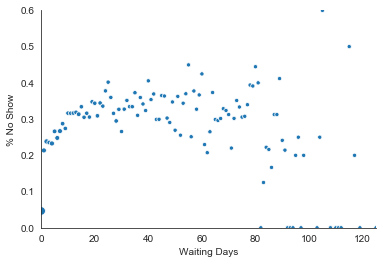

In [86]:
waiting_days = med_numeric.groupby(['Waiting_Days']).count().reset_index()['Waiting_Days']
prob_waiting_noshow = med_numeric.groupby(['Waiting_Days']).sum()['No_Show']/med_numeric.groupby(['Waiting_Days']).count()['No_Show']
waiting_days_count = med_numeric.groupby(['Waiting_Days']).count()['No_Show']

ax = sns.scatterplot(x=waiting_days,
                     y=prob_waiting_noshow,
                     size=waiting_days_count,
                    legend = False)

ax.set(xlabel='Waiting Days', ylabel='% No Show', title='')
ax.set(xlim=(0,125),ylim=(0,0.6))
sns.despine(top=True, right=True);
plt.savefig('Figures_Presentation/Waiting_Days.png',dpi=800,bbox_inches='tight')

# 3. Data Correlation

### 3.1 Correlation Heatmap

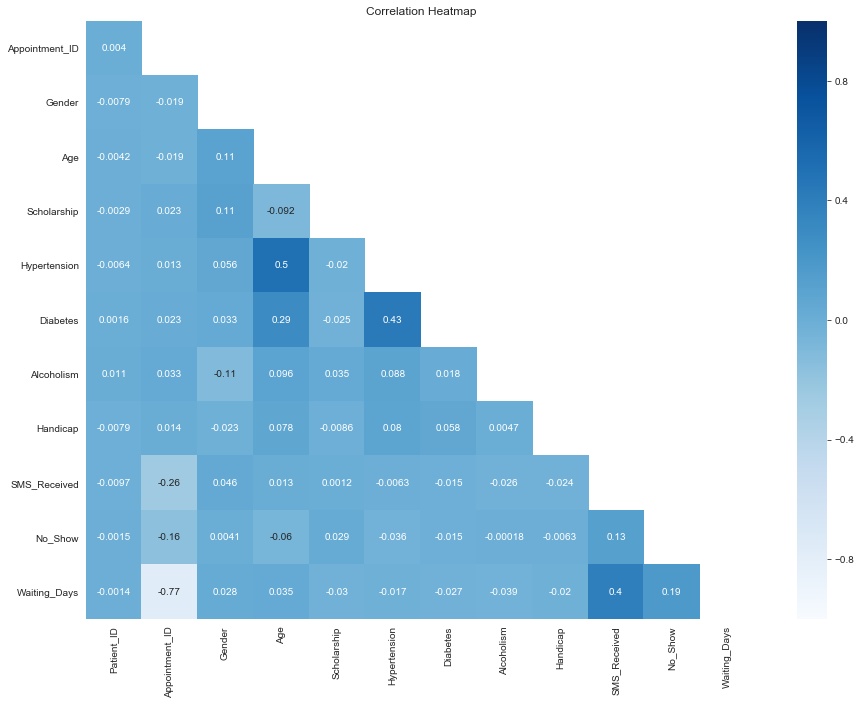

In [87]:
mask = np.zeros_like(med_numeric.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = plt.figure(figsize=(15,11))
ax = sns.heatmap(med_numeric.corr(),
            vmin=-1,
            vmax=1,
            cmap='Blues',
            annot=True,
            mask = mask)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top + 0.5)
ax.set(title="Correlation Heatmap");

### 2.2 Correlation Heatmap for No-Shows

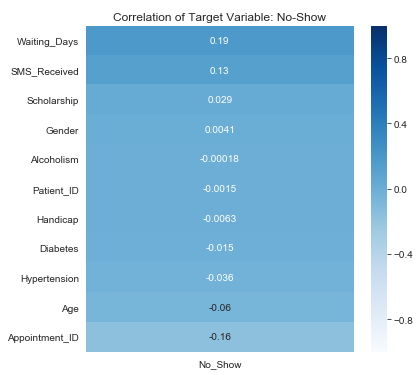

In [88]:
plt.figure(figsize=(6,6))
ax = sns.heatmap(med_numeric.corr()[['No_Show']].sort_values(by=['No_Show'],ascending=False),
            vmin=-1,
            vmax=1,
            cmap='Blues',
            annot=True);

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top + 0.5)
ax.set(title="Correlation of Target Variable: No-Show");

In [89]:
med_numeric['Patient_ID'].astype('category')

0          29872499824296
1         558997776694438
2           4262962299951
3            867951213174
4           8841186448183
               ...       
110522      2572134369293
110523      3596266328735
110524     15576631729893
110525     92134931435557
110526    377511518121127
Name: Patient_ID, Length: 110521, dtype: category
Categories (62298, int64): [39217, 43741, 93779, 141724, ..., 999934989273974, 999946536742891, 999968578354866, 999981631772427]

In [90]:
med_numeric.to_pickle('Data_Sets/Medical_Appointments_2.pkl')